# **Solar Radiation Prediction**

In [1]:
### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Downloads/cleaned_solar_dataset.csv")
df.head()

,Year,Month,Day,Hour,ALLSKY_SFC_SW_DWN,Temperature,Relative_Humidity,Surface_Pressure,Wind_Speed
0,2023,1,1,0,0.0,14.02,76.07,94.45,2.49
1,2023,1,1,1,0.0,13.41,76.67,94.41,2.56
2,2023,1,1,2,0.0,12.75,77.98,94.37,2.70
3,2023,1,1,3,0.0,12.17,79.42,94.37,2.86
4,2023,1,1,4,0.0,11.70,80.51,94.38,2.99


In [3]:
print(df['ALLSKY_SFC_SW_DWN'].unique())

[  0.     3.58 122.35 ... 131.38  51.2   10.18]


In [4]:
print(df.describe())

               Year         Month           Day          Hour  \
count  13843.000000  13843.000000  13843.000000  13843.000000   
mean    2023.367189      5.597847     15.694864     11.503431   
std        0.482056      3.236257      8.781931      6.921279   
min     2023.000000      1.000000      1.000000      0.000000   
25%     2023.000000      3.000000      8.000000      6.000000   
50%     2023.000000      5.000000     16.000000     12.000000   
75%     2024.000000      8.000000     23.000000     18.000000   
max     2024.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN   Temperature  Relative_Humidity  Surface_Pressure  \
count       13843.000000  13843.000000       13843.000000      13843.000000   
mean          213.844994     24.507748          65.196847         93.917887   
std           293.626601      5.813934          26.154846          0.351561   
min             0.000000      8.870000           9.170000         92.600000   
25%             0.0

In [5]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Hour                 0
ALLSKY_SFC_SW_DWN    0
Temperature          0
Relative_Humidity    0
Surface_Pressure     0
Wind_Speed           0
dtype: int64

In [6]:
import pandas as pd

# Check the hours where ALLSKY_SFC_SW_DWN is 0
zero_hours = df[df['ALLSKY_SFC_SW_DWN'] == 0]['Hour'].unique()
print("Hours where solar radiation is 0:", zero_hours)


Hours where solar radiation is 0: [ 0  1  2  3  4  5 18 19 20 21 22 23  6]


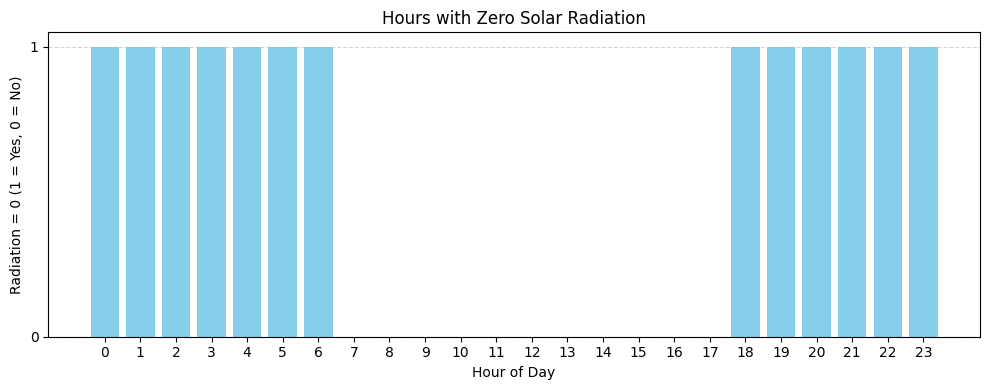

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and column is 'ALLSKY_SFC_SW_DWN'
# Get hours where radiation is 0
zero_hours = df[df['ALLSKY_SFC_SW_DWN'] == 0]['Hour'].unique()

# Create a binary list: 1 if radiation is 0 at that hour, else 0
hour_labels = list(range(24))
zero_radiation_flags = [1 if hour in zero_hours else 0 for hour in hour_labels]

# Plot
plt.figure(figsize=(10, 4))
plt.bar(hour_labels, zero_radiation_flags, color='skyblue')
plt.xticks(hour_labels)
plt.xlabel('Hour of Day')
plt.ylabel('Radiation = 0 (1 = Yes, 0 = No)')
plt.title('Hours with Zero Solar Radiation')
plt.yticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


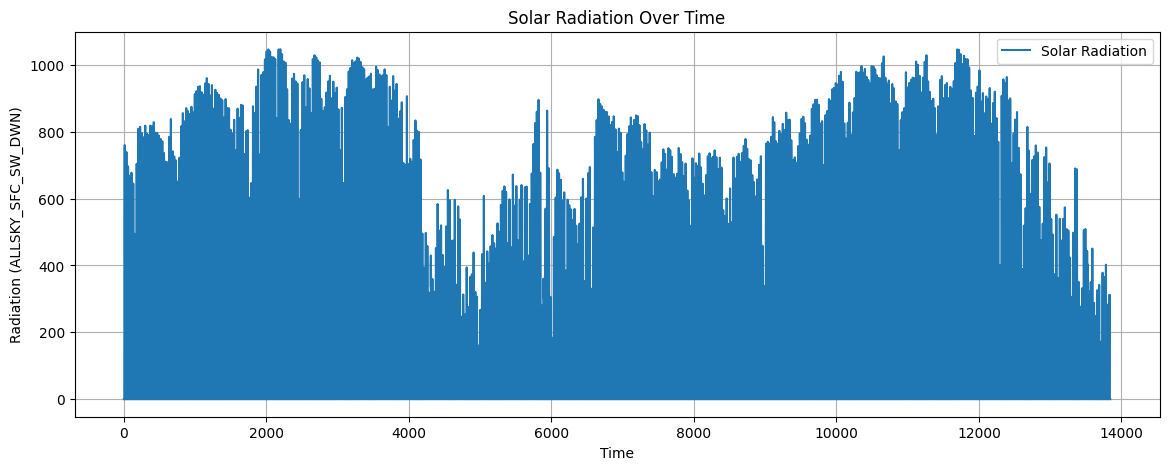

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(df['ALLSKY_SFC_SW_DWN'], label='Solar Radiation')
plt.title('Solar Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('Radiation (ALLSKY_SFC_SW_DWN)')
plt.legend()
plt.grid(True)
plt.show()


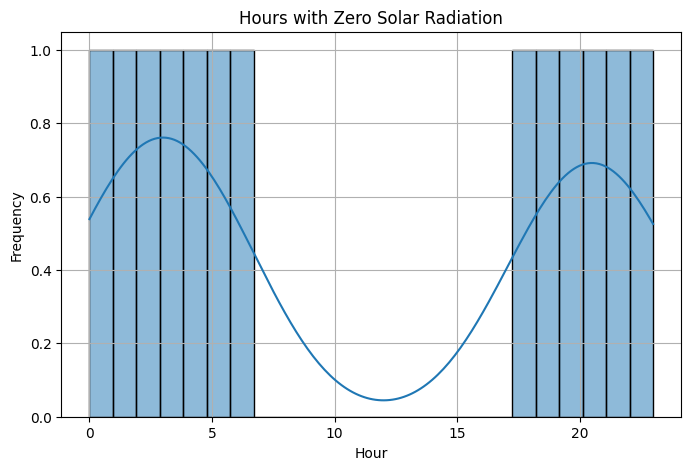

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
#sns.histplot(zero_hours, bins=24, color='blue', edgecolor='black')
sns.histplot(zero_hours, bins=24, kde=True, kde_kws={"bw_adjust": 0.5})

plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Hours with Zero Solar Radiation")
plt.grid(True)
plt.show()


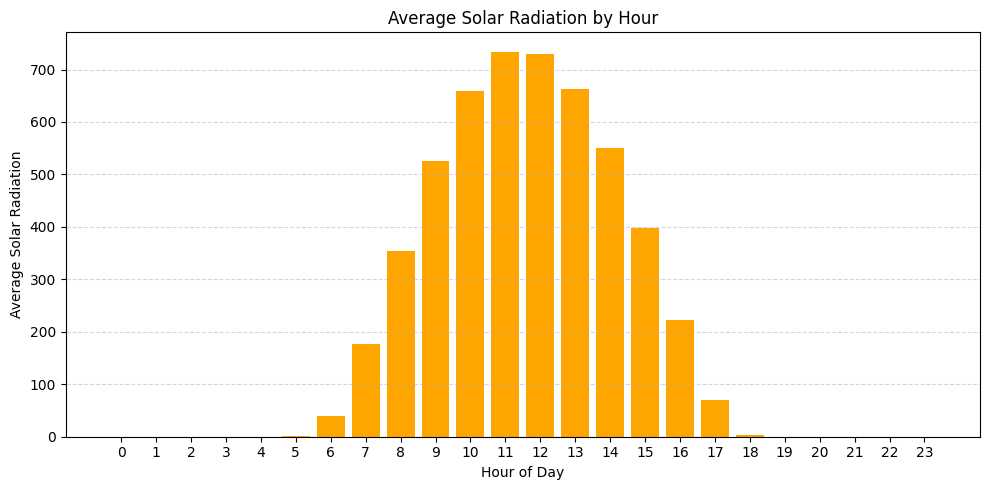

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Group by hour and calculate average radiation
avg_radiation_by_hour = df.groupby('Hour')['ALLSKY_SFC_SW_DWN'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_radiation_by_hour.index, avg_radiation_by_hour.values, color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Average Solar Radiation')
plt.title('Average Solar Radiation by Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


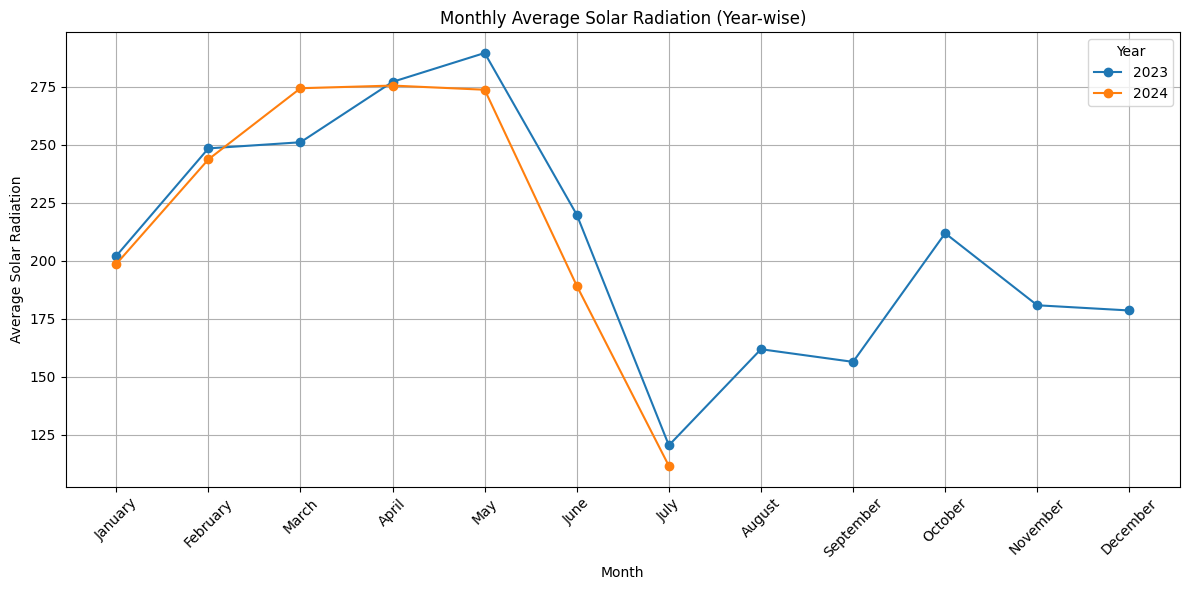

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
# Assuming df is your DataFrame with datetime index set
# Group by year and month to calculate average radiation
monthly_avg = df.groupby([df.index.year, df.index.month])['ALLSKY_SFC_SW_DWN'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 2023
plt.plot(monthly_avg.columns, monthly_avg.loc[2023], marker='o', linestyle='-', label='2023')

# Plot for 2024
plt.plot(monthly_avg.columns, monthly_avg.loc[2024], marker='o', linestyle='-', label='2024')

plt.title('Monthly Average Solar Radiation (Year-wise)')
plt.xlabel('Month')
plt.ylabel('Average Solar Radiation')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Use calendar module for month names
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


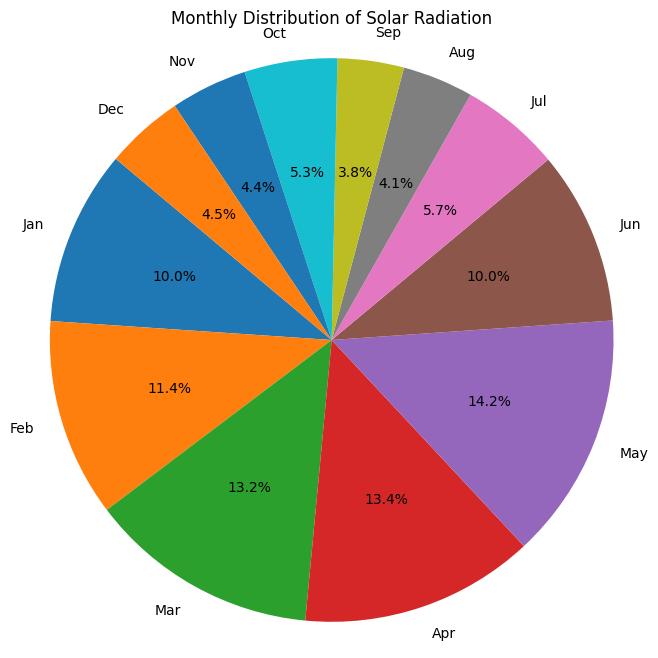

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
# Assuming df is your DataFrame with datetime index set and 'ALLSKY_SFC_SW_DWN' column

# Group by month and calculate total radiation
monthly_total = df.groupby(df.index.month)['ALLSKY_SFC_SW_DWN'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(monthly_total, labels=monthly_total.index.map(lambda x: calendar.month_abbr[x]), autopct='%1.1f%%', startangle=140)
plt.title('Monthly Distribution of Solar Radiation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# df['sin_hour'] = np.sin(2 * np.pi * df['Hour'] / 24)
# df['cos_hour'] = np.cos(2 * np.pi * df['Hour'] / 24)
# # df['sin_day_of_year'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
# # df['cos_day_of_year'] = np.cos(2 * np.pi * df['day_of_year'] / 365)


In [11]:
import pandas as pd

# Step 1: Load your dataset
#df = pd.read_csv("../Downloads/cleaned_solar_dataset.csv")

# # Step 2: Create 'Datetime' column from Year, Month, Day, Hour
# df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

# # Step 3: Set 'Datetime' as index
# df = df.set_index('Datetime')

# Step 4: Create full hourly date range from start to end of your dataset
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')

# Step 5: Find missing timestamps
missing_hours = full_index.difference(df.index)

# Step 6: Print the result
print(f"Total missing hourly timestamps: {len(missing_hours)}")
print("First 10 missing hours:")
print(missing_hours[:10])


Total missing hourly timestamps: 1
First 10 missing hours:
DatetimeIndex(['1970-01-01 00:00:00'], dtype='datetime64[ns]', freq='h')


In [12]:
# Assuming you have your missing_hours DatetimeIndex as before

missing_dates = missing_hours.date  # Extract just the date part
missing_dates_count = pd.Series(missing_dates).value_counts().sort_index()
print(missing_dates_count)


1970-01-01    1
Name: count, dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Hour                 0
ALLSKY_SFC_SW_DWN    0
Temperature          0
Relative_Humidity    0
Surface_Pressure     0
Wind_Speed           0
dtype: int64

In [15]:
# Converting to date time
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.drop(columns=['Year', 'Month', 'Day','Hour'], inplace=True)

In [16]:
df['hour'] = df['Datetime'].dt.hour  # Important for solar cycle
df['day_of_week'] = df['Datetime'].dt.dayofweek  # Weekday/weekend trend
df['month'] = df['Datetime'].dt.month  # Seasonal variations
df['week_of_year'] = df['Datetime'].dt.isocalendar().week  # Week-based patterns
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # Weekend indicator
df['day_of_year'] = df['Datetime'].dt.dayofyear  # Captures yearly solar trend

In [17]:
# Assuming 'Datetime' column exists and is converted to datetime dtype
#df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as index
df = df.set_index('Datetime')

# Create a complete hourly datetime index from min to max datetime in your data
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')

# Reindex your DataFrame to this full hourly index (adds missing hours with NaNs)
df = df.reindex(full_index)

# Interpolate missing values using time method (works well for time series)
df_interpolated = df.interpolate(method='time')


In [67]:
df['prev_hour_radiation'] = df['ALLSKY_SFC_SW_DWN'].shift(1)  # Previous hour radiation
df['radiation_rolling_3'] = df['ALLSKY_SFC_SW_DWN'].shift(1).rolling(window=3).mean()  # Mean of last 3 hours


In [68]:
missing_after = df_interpolated[df_interpolated.isnull().any(axis=1)]
print("Rows with missing values after interpolation:")
print(missing_after)


Rows with missing values after interpolation:
Empty DataFrame
Columns: [ALLSKY_SFC_SW_DWN, Temperature, Relative_Humidity, Surface_Pressure, Wind_Speed, hour, day_of_week, month, week_of_year, is_weekend, day_of_year]
Index: []


In [69]:
#df.set_index('Datetime', inplace=True)
#df.drop(columns=['day_of_year','hour'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13031 entries, 2023-01-01 00:00:00 to 2024-07-30 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALLSKY_SFC_SW_DWN    13031 non-null  float64
 1   Temperature          13031 non-null  float64
 2   Relative_Humidity    13031 non-null  float64
 3   Surface_Pressure     13031 non-null  float64
 4   Wind_Speed           13031 non-null  float64
 5   hour                 13031 non-null  float64
 6   day_of_week          13031 non-null  float64
 7   month                13031 non-null  float64
 8   week_of_year         13031 non-null  UInt32 
 9   is_weekend           13031 non-null  float64
 10  day_of_year          13031 non-null  float64
 11  Wind_Power           13031 non-null  float64
 12  prev_hour_radiation  13030 non-null  float64
 13  radiation_rolling_3  13028 non-null  float64
dtypes: UInt32(1), float64(13)
memory usage: 1.5 MB


In [71]:
df.index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               ...
               '2024-07-30 14:00:00', '2024-07-30 15:00:00',
               '2024-07-30 16:00:00', '2024-07-30 17:00:00',
               '2024-07-30 18:00:00', '2024-07-30 19:00:00',
               '2024-07-30 20:00:00', '2024-07-30 21:00:00',
               '2024-07-30 22:00:00', '2024-07-30 23:00:00'],
              dtype='datetime64[ns]', length=13031, freq=None)

In [72]:
#df['solar_lag_1'] = df['ALLSKY_SFC_SW_DWN'].shift(1)  # Previous hour
#df['solar_lag_2'] = df['ALLSKY_SFC_SW_DWN'].shift(2)  # Two hours ago
#df['solar_lag_3'] = df['ALLSKY_SFC_SW_DWN'].shift(3)  # Three hours ago
#df['solar_lag_24'] = df['ALLSKY_SFC_SW_DWN'].shift(24)  # One day ago
#df["solar_radiation_rolling_mean_3"] = df["ALLSKY_SFC_SW_DWN"].shift(1).rolling(window=3).mean()
#df["solar_radiation_rolling_mean_7"] = df["ALLSKY_SFC_SW_DWN"].shift(1).rolling(window=7).mean()


In [73]:
#df['solar_lag_6'] = df['ALLSKY_SFC_SW_DWN'].shift(6)
#df['solar_lag_48'] = df['ALLSKY_SFC_SW_DWN'].shift(48)

In [74]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,5))
# plot_acf(df['ALLSKY_SFC_SW_DWN'], lags=48)  # Check correlation up to 48 hours
# plt.show()


### Removing Outliers

In [75]:
# import pandas as pd

# def remove_outliers_iqr(df, columns=None, multiplier=1.5):
#     """
#     Automatically remove outliers from a DataFrame using the IQR method.
    
#     Parameters:
#     - df: pandas DataFrame
#     - columns: list of column names to check for outliers. If None, all numeric columns are used.
#     - multiplier: the IQR multiplier (default = 1.5; higher = less aggressive)
    
#     Returns:
#     - Cleaned DataFrame with outliers removed.
#     """
#     if columns is None:
#         columns = df.select_dtypes(include='number').columns.tolist()
    
#     cleaned_df = df.copy()
    
#     for col in columns:
#         Q1 = cleaned_df[col].quantile(0.25)
#         Q3 = cleaned_df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - multiplier * IQR
#         upper_bound = Q3 + multiplier * IQR
#         before_rows = cleaned_df.shape[0]
#         cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
#         after_rows = cleaned_df.shape[0]
#         print(f"{col}: Removed {before_rows - after_rows} outliers")
    
#     return cleaned_df


In [76]:
# # Assuming your DataFrame is called df and target is 'ALLSKY_SFC_SW_DWN'
# df_cleaned = remove_outliers_iqr(df, columns=['ALLSKY_SFC_SW_DWN'])
# df_cleaned = remove_outliers_iqr(df)  # All numeric columns

In [77]:
import pandas as pd

def remove_outliers_iqr(df, columns=None, target_col=None, multiplier=1.5):
    """
    Automatically remove outliers using the IQR method from input features only (excluding the target).
    
    Parameters:
    - df: pandas DataFrame
    - columns: list of input column names to check for outliers. If None, all numeric columns are used.
    - target_col: column name of the target variable to exclude from outlier removal
    - multiplier: the IQR multiplier (default = 1.5; higher = less aggressive)
    
    Returns:
    - Cleaned DataFrame with outliers removed from input features only.
    """
    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()
    
    if target_col and target_col in columns:
        columns.remove(target_col)

    cleaned_df = df.copy()

    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        before_rows = cleaned_df.shape[0]
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
        after_rows = cleaned_df.shape[0]
        print(f"{col}: Removed {before_rows - after_rows} outliers")

    return cleaned_df


In [78]:
# Your target is 'ALLSKY_SFC_SW_DWN'
df_cleaned = remove_outliers_iqr(df, target_col='ALLSKY_SFC_SW_DWN')

Temperature: Removed 61 outliers
Relative_Humidity: Removed 0 outliers
Surface_Pressure: Removed 3 outliers
Wind_Speed: Removed 102 outliers
hour: Removed 0 outliers
day_of_week: Removed 0 outliers
month: Removed 0 outliers
week_of_year: Removed 0 outliers
is_weekend: Removed 0 outliers
day_of_year: Removed 0 outliers
Wind_Power: Removed 1316 outliers
prev_hour_radiation: Removed 415 outliers
radiation_rolling_3: Removed 417 outliers


In [79]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select numerical columns to normalize
numerical_cols = [
    'Temperature', 
    'Relative_Humidity', 
    'Surface_Pressure',  
    'Wind_Speed'
]


# Fit and transform the dataset
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


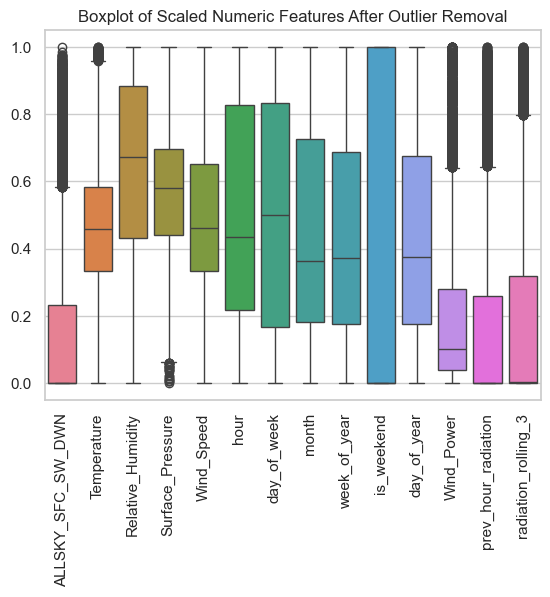

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_scaled = df_cleaned.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

sns.boxplot(data=df_scaled[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Numeric Features After Outlier Removal")
plt.show()


In [81]:
df=df_cleaned

In [82]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler

# # Rescale after cleaning
# scaled = MinMaxScaler().fit_transform(df_cleaned.select_dtypes(include='number'))
# scaled_df = pd.DataFrame(scaled, columns=df_cleaned.select_dtypes(include='number').columns)

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=scaled_df)
# plt.title("Boxplot of Scaled Numeric Features After Outlier Removal (Including Target)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [83]:
#df['Perceived_Temp'] = df['Temperature'] - (df['Relative_Humidity'] / 100) * 5
df['Wind_Power'] = 0.5 * 1.225 * (df['Wind_Speed'] ** 3)  # 1.225 kg/m³ = air density

In [84]:
# df['Wind_Speed_Squared'] = df['Wind_Speed'] ** 2
# df['Temp_Pressure_Ratio'] = df['Temperature'] / df['Surface_Pressure']
# df['Wind_Temp_Interaction'] = df['Wind_Speed'] * df['Temperature']

In [85]:
df.dropna(inplace=True)

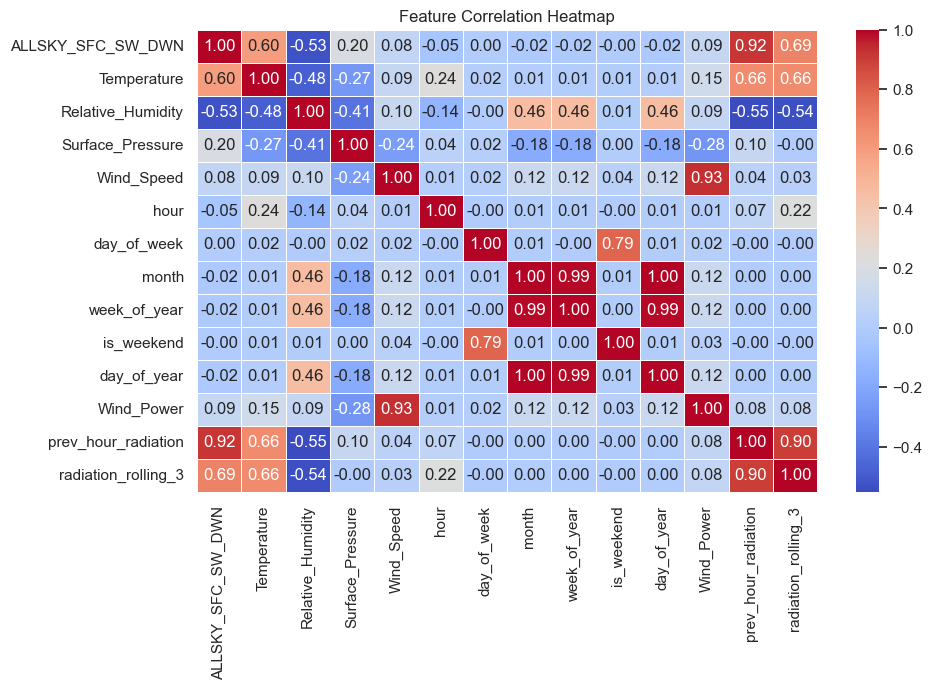

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


In [87]:
#print(df['ALLSKY_SFC_SW_DWN'].value_counts())
print(df['ALLSKY_SFC_SW_DWN'].nunique())


4117


### Applying Automl for hyperparameter tuning and model selection

In [88]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Initialize H2O
h2o.init()

# Convert Pandas DataFrame to H2O Frame
h2o_df = h2o.H2OFrame(df)

# Define target and features
target = "ALLSKY_SFC_SW_DWN"
features = [col for col in h2o_df.columns if col != target]

# ✅ Split dataset (80% training, 20% testing)
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)

# ✅ Get the best GBM model dynamically (no need to copy-paste model name)
leaderboard = aml.leaderboard.as_data_frame()  # Convert leaderboard to Pandas DataFrame
gbm_models = leaderboard[leaderboard['model_id'].str.contains('GBM')]  # Filter GBM models

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,16 mins 23 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,9 months and 3 days
H2O_cluster_name:,H2O_from_python_ayush_qieq49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.218 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
07:56:33.514: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


In [89]:
print(aml.leaderboard)

model_id                                                   rmse      mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20250805_75633     19.6779  387.221   8.34417  nan                          387.221
StackedEnsemble_BestOfFamily_1_AutoML_2_20250805_75633  19.9641  398.565   8.61746  nan                          398.565
GBM_2_AutoML_2_20250805_75633                           20.1591  406.39    8.72651  nan                          406.39
GBM_grid_1_AutoML_2_20250805_75633_model_1              20.196   407.88    8.97113  nan                          407.88
GBM_4_AutoML_2_20250805_75633                           20.6858  427.902   8.62278  nan                          427.902
GBM_5_AutoML_2_20250805_75633                           20.8516  434.791   9.48013  nan                          434.791
DRF_1_AutoML_2_20250805_75633                           21.3744  456.867   9.29812    0.490025                   456.867
XRT_1_AutoML_2_20250805_75633     

Best GBM Model: GBM_2_AutoML_2_20250805_75633


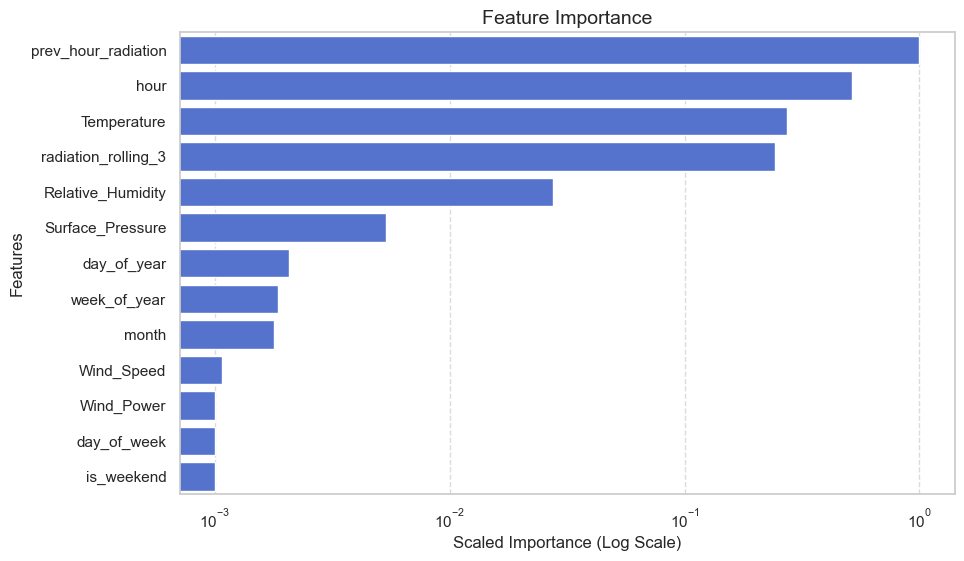

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o

# ✅ Get the best GBM model from AutoML
if not gbm_models.empty:
    best_gbm_id = gbm_models.iloc[0, 0]  # Get the first (best) GBM model ID
    best_gbm = h2o.get_model(best_gbm_id)  # Load the best GBM model
    print(f"Best GBM Model: {best_gbm_id}")
else:
    print("No GBM models found in AutoML leaderboard.")
    best_gbm = None

# ✅ Plot Feature Importance if GBM model is found
if best_gbm:
    # 🔹 Get variable importance
    varimp = best_gbm.varimp(use_pandas=True)

    # 🔹 Ensure no zero values before applying log scale
    varimp['scaled_importance'] = np.maximum(varimp['scaled_importance'], 1e-3)

    # 🔹 Sort features for better visualization
    varimp = varimp.sort_values(by='scaled_importance', ascending=False)

    # 🔹 Plot using Matplotlib & Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='scaled_importance', y='variable', data=varimp, color='royalblue')

    # 🔹 Apply log scale for better differentiation
    plt.xscale('log')

    # 🔹 Formatting
    plt.title('Feature Importance', fontsize=14)
    plt.xlabel('Scaled Importance (Log Scale)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', linestyle='dashed', alpha=0.7)

    plt.show()


In [91]:
# # Check if there are any null values in each column
# print("Null values per column:")
# print(df.isnull().sum())

# # Check if there are any negative values in each numeric column
# numeric_cols = df.select_dtypes(include=['number']).columns

# print("\nNegative values per numeric column:")
# for col in numeric_cols:
#     neg_count = (df[col] < 0).sum()
#     print(f"{col}: {neg_count} negatives")


In [92]:
feature_importance = best_gbm.varimp(use_pandas=True)  
feature_importance

,variable,relative_importance,scaled_importance,percentage
0,prev_hour_radiation,1.221264e+09,1.000000,0.482382
1,hour,6.309306e+08,0.516621,0.249209
2,Temperature,3.333985e+08,0.272995,0.131688
3,radiation_rolling_3,2.961228e+08,0.242472,0.116964
4,Relative_Humidity,3.368340e+07,0.027581,0.013304
5,Surface_Pressure,6.534384e+06,0.005351,0.002581
6,day_of_year,2.522592e+06,0.002066,0.000996
7,week_of_year,2.265853e+06,0.001855,0.000895
8,month,2.191304e+06,0.001794,0.000866
9,Wind_Speed,1.313033e+06,0.001075,0.000519


In [93]:
# Select top 10 features based on importance
top_features = feature_importance.nlargest(8, 'scaled_importance')['variable'].tolist()

# Keep only selected features + target column
df_selected = df[top_features + ['ALLSKY_SFC_SW_DWN']]

# Display selected features
print("Selected Features:", top_features)
df_selected.head()


Selected Features: ['prev_hour_radiation', 'hour', 'Temperature', 'radiation_rolling_3', 'Relative_Humidity', 'Surface_Pressure', 'day_of_year', 'week_of_year']


,prev_hour_radiation,hour,Temperature,radiation_rolling_3,Relative_Humidity,Surface_Pressure,day_of_year,week_of_year,ALLSKY_SFC_SW_DWN
2023-01-01 03:00:00,0.00,3.0,12.17,0.000000,79.42,94.37,1.0,52,0.00
2023-01-01 04:00:00,0.00,4.0,11.70,0.000000,80.51,94.38,1.0,52,0.00
2023-01-01 07:00:00,0.00,7.0,14.47,0.000000,73.80,94.58,1.0,52,122.35
2023-01-01 08:00:00,122.35,8.0,17.70,40.783333,60.97,94.64,1.0,52,329.95
2023-01-01 09:00:00,329.95,9.0,21.10,150.766667,55.43,94.65,1.0,52,527.70


In [94]:
### Training the model

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Ensure the DataFrame is sorted by the datetime index
df = df.sort_index()

# Perform time-based split (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Define features (X) and target (y) for train and test sets
X_train = train.drop(columns=['ALLSKY_SFC_SW_DWN'])
y_train = train['ALLSKY_SFC_SW_DWN']
X_test = test.drop(columns=['ALLSKY_SFC_SW_DWN'])
y_test = test['ALLSKY_SFC_SW_DWN']

# Print shapes
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

# Print time ranges
print("Train time range:", X_train.index.min(), "to", X_train.index.max())
print("Test time range:", X_test.index.min(), "to", X_test.index.max())

Training Shape: (8573, 13)
Testing Shape: (2144, 13)
Train time range: 2023-01-01 03:00:00 to 2024-03-15 08:00:00
Test time range: 2024-03-15 09:00:00 to 2024-07-30 23:00:00


In [97]:
df.index

DatetimeIndex(['2023-01-01 03:00:00', '2023-01-01 04:00:00',
               '2023-01-01 07:00:00', '2023-01-01 08:00:00',
               '2023-01-01 09:00:00', '2023-01-01 10:00:00',
               '2023-01-01 11:00:00', '2023-01-01 12:00:00',
               '2023-01-01 15:00:00', '2023-01-01 16:00:00',
               ...
               '2024-07-30 04:00:00', '2024-07-30 05:00:00',
               '2024-07-30 06:00:00', '2024-07-30 17:00:00',
               '2024-07-30 18:00:00', '2024-07-30 19:00:00',
               '2024-07-30 20:00:00', '2024-07-30 21:00:00',
               '2024-07-30 22:00:00', '2024-07-30 23:00:00'],
              dtype='datetime64[ns]', length=10717, freq=None)

#### ___________________________________________________________________________________________________________________________

In [98]:
df.dropna(inplace=True)

In [99]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [300, 400, 500],  # More trees might help
#     'max_depth': [15, 20, 25],  # Try deeper trees
#     'max_features': [0.5, 0.6, 0.7],  # Test slight variations
#     'min_samples_leaf': [2, 3, 5],  # Adjust leaf count
#     'min_samples_split': [5, 10, 15],  # Experiment with split thresholds
#     'bootstrap': [False]
# }

# rf = RandomForestRegressor(random_state=42)
# rf_grid = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# rf_grid.fit(X_train, y_train)

# print("Best R²:", rf_grid.best_score_)
# print("Best Params:", rf_grid.best_params_)


In [100]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#xgb_model = XGBRegressor(n_estimators=500, max_depth=20, learning_rate=0.03, random_state=42)
xgb_model = XGBRegressor(
    colsample_bytree=0.8670,
    gamma=1,
    learning_rate=0.0174,
    max_depth=10,
    n_estimators=500,
    reg_alpha=4,
    reg_lambda=5,
    subsample=0.7673,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost R² Score: 0.9877823640819112


In [101]:
# import matplotlib.pyplot as plt

# plt.scatter(X_train['prev_hour_radiation'], y_train, alpha=0.5)
# plt.xlabel('Previous Hour Radiation')
# plt.ylabel('Target Radiation')
# plt.title('Scatter plot for linearity check')
# plt.show()


In [102]:
# from scipy.stats import zscore
# df['z_score'] = zscore(df['ALLSKY_SFC_SW_DWN'])
# outliers = df[df['z_score'].abs() > 3]
# print(outliers)


In [103]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, r2_score

# # Define your base model
# xgb = XGBRegressor(random_state=42)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [400, 500, 600],
#     'max_depth': [8, 10, 12],
#     'learning_rate': [0.01, 0.0174, 0.02],
#     'subsample': [0.7, 0.7673, 0.8],
#     'colsample_bytree': [0.8, 0.8670, 0.9],
#     'gamma': [3, 5, 7],
#     'reg_alpha': [3, 4, 5],
#     'reg_lambda': [3, 5, 7]
# }

# # Use R² as scoring metric
# r2_scorer = make_scorer(r2_score)

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=r2_scorer,
#     cv=3,            # 3-fold cross-validation
#     verbose=2,
#     n_jobs=-1        # use all CPU cores
# )

# # Fit grid search on training data
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)

# # Best model
# best_model = grid_search.best_estimator_

# # Evaluate on test set
# y_pred = best_model.predict(X_test)
# print("Test R² Score:", r2_score(y_test, y_pred))


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Optimized Random Forest model based on GridSearchCV results
rf_model = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=400,
    random_state=42
)




# Train the optimized model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


MSE: 892.7717652791006
RMSE: 29.87928655907133
MAE: 14.480757845891137
R² Score: 0.9848713066086263


In [105]:
### Code for Grid Search for Parameters Tuning

In [106]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")  # Hides all warnings

from lightgbm import LGBMRegressor

# lgb_model = LGBMRegressor(
#     n_estimators=1000,
#     learning_rate=0.01,
#     max_depth=15,
#     num_leaves=64,
#     min_child_samples=10,
#     subsample=0.8,
#     colsample_bytree=1.0,
#     random_state=42,
#     verbose=-1
# )
lgb_model = LGBMRegressor(
    n_estimators=200,      # fewer trees for faster training
    learning_rate=0.01,    # a bit higher learning rate to compensate fewer trees
    max_depth=5,          # simpler trees to reduce complexity
    random_state=42,
    verbose=-1
)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print("Optimized LightGBM R² Score:", r2_score(y_test, y_pred_lgb))
print("MSE : ",mean_squared_error(y_test,y_pred_lgb))

Optimized LightGBM R² Score: 0.9655750388396048
MSE :  2031.4796889435645


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression

# Step 3: Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Step 4: Train the model
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Step 5: Predict and evaluate
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
print("Neural Network R² Score:", r2_score(y_test, y_pred_nn))
print("Neural Network MSE:", mean_squared_error(y_test, y_pred_nn))


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
Neural Network R² Score: 0.9873832697760807
Neural Network MSE: 744.5362413439616


In [108]:
### Hybrid model ensemble Stacking (xgb,randomforest and lightbgm)

In [109]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming these models are already trained and defined:
# rf_model, xgb_model, lgb_model

# Define the stacking ensemble with pre-configured models
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgb', lgb_model)
    ],
    final_estimator=LinearRegression(),
    passthrough=True,
    n_jobs=-1
)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacked_model.predict(X_test)
print("Stacking Ensemble R²:", r2_score(y_test, y_pred_stack))
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_stack = mean_squared_error(y_test, y_pred_stack)
print("Stacking Ensemble MSE:", mse_stack)

Stacking Ensemble R²: 0.9880567593354119
Stacking Ensemble MSE: 704.7923951818082


In [110]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Scale your features for the NN (but all models will use scaled data now)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to build the neural network
def build_nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the model using KerasRegressor
nn_model = KerasRegressor(model=build_nn_model, epochs=100, batch_size=32, verbose=0)

# Define the stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgb', lgb_model),
        ('nn', nn_model)
    ],
    final_estimator=LinearRegression(),
    passthrough=True,
    n_jobs=-1
)

# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_stack = stacked_model.predict(X_test_scaled)
print("Stacking Ensemble (with NN) R²:", r2_score(y_test, y_pred_stack))
print("Stacking Ensemble (with NN) MSE:", mean_squared_error(y_test, y_pred_stack))


Stacking Ensemble (with NN) R²: 0.9891736054324967
Stacking Ensemble (with NN) MSE: 638.8852718205801


In [111]:
df_results = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest","LightGBM","Neural Network","Stacking"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_lgb),
        mean_absolute_error(y_test,y_pred_nn),
        mean_absolute_error(y_test, y_pred_stack)
        

    ],
    "RMSE": [
        mean_squared_error(y_test, y_pred_xgb, squared=False),
        mean_squared_error(y_test, y_pred_rf, squared=False),
        mean_squared_error(y_test, y_pred_lgb, squared=False),
        mean_squared_error(y_test,y_pred_nn,squared=False),
        mean_squared_error(y_test, y_pred_stack, squared=False)
    ],

     "MSE": [
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_lgb),
        mean_squared_error(y_test,y_pred_nn),
        mean_squared_error(y_test, y_pred_stack)
    ],
    
    "R² Score": [
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_lgb),
        r2_score(y_test,y_pred_nn),
        r2_score(y_test, y_pred_stack)
    ],
   
})

# Display the results
df_results


,Model,MAE,RMSE,MSE,R² Score
0,XGBoost,11.526485,26.851163,720.984959,0.987782
1,Random Forest,14.480758,29.879287,892.771765,0.984871
2,LightGBM,32.185388,45.071939,2031.479689,0.965575
3,Neural Network,11.565421,27.286191,744.536241,0.987383
4,Stacking,11.283746,25.276180,638.885272,0.989174


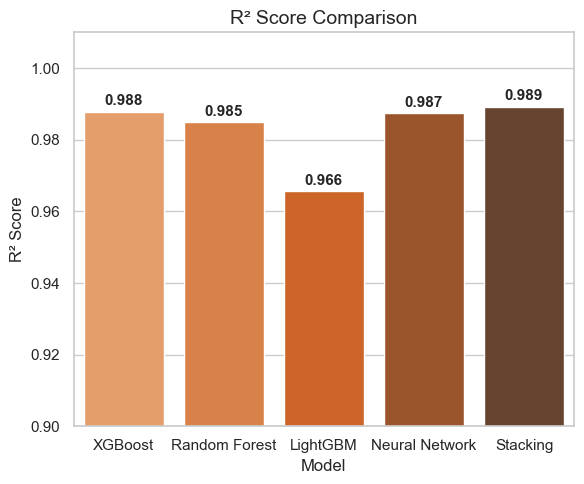

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(x="Model", y="R² Score", data=df_results, palette="Oranges_d")

#Add data labels on top of each bar
for i, row in df_results.iterrows():
    ax.text(i, row["R² Score"]+ 0.001, f'{row["R² Score"]:.3f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
# for i, row in df_results.iterrows():
#     ax.text(i, row["R² Score"] + 0.001, f'{row["R² Score"]:.6f}',  # Adjust the format to show more decimal places
#             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Set titles and labels
plt.title("R² Score Comparison", fontsize=14)
plt.ylim(0.90, 1.01)  # Adjusted upper limit for better spacing above bars
#plt.ylim(0.90,0.992)
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.tight_layout()
plt.show()


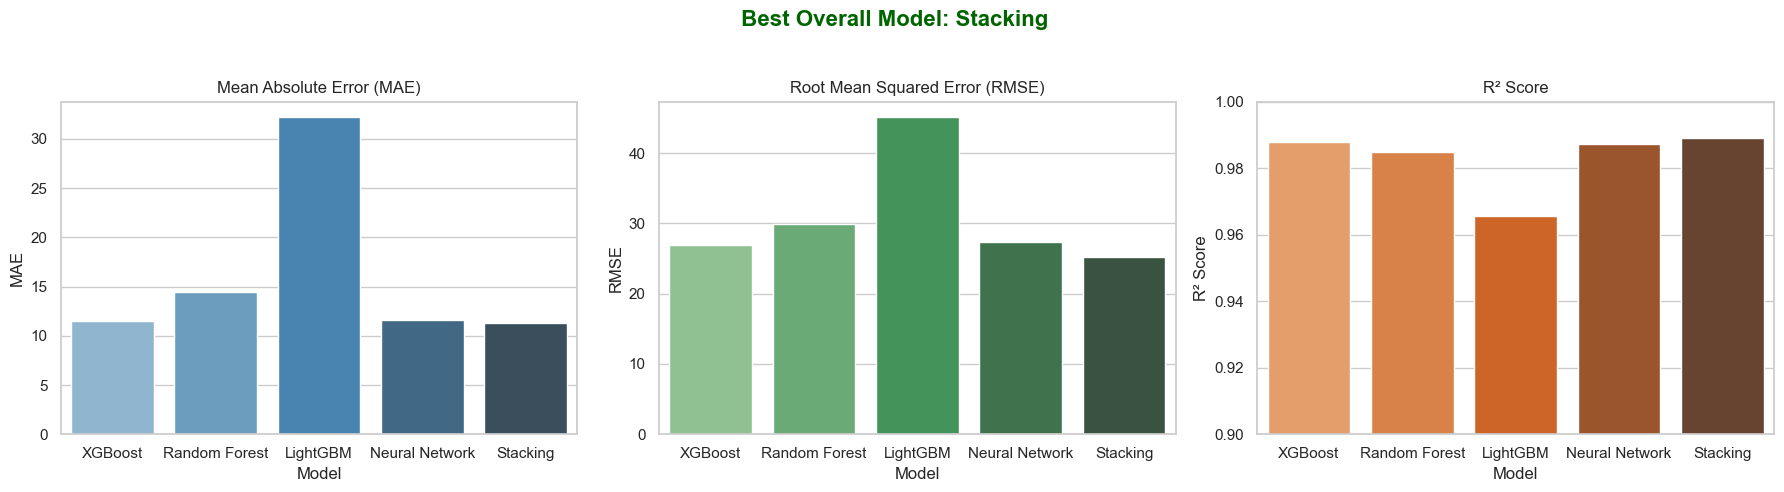

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Copy the results to avoid altering original
df_norm = df_results.copy()

# Step 1: Invert MAE and RMSE (lower is better → higher is better)
df_norm["MAE_inv"] = df_norm["MAE"].max() - df_norm["MAE"]
df_norm["RMSE_inv"] = df_norm["RMSE"].max() - df_norm["RMSE"]

# Step 2: Normalize MAE_inv, RMSE_inv, and R² Score
scaler = MinMaxScaler()
df_norm[["MAE_norm", "RMSE_norm", "R2_norm"]] = scaler.fit_transform(
    df_norm[["MAE_inv", "RMSE_inv", "R² Score"]]
)

# Step 3: Calculate composite score
df_norm["Overall Score"] = df_norm[["MAE_norm", "RMSE_norm", "R2_norm"]].mean(axis=1)

# Step 4: Identify best model
best_model_name = df_norm.loc[df_norm["Overall Score"].idxmax(), "Model"]

# Step 5: Plot original metrics
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# MAE
sns.barplot(x="Model", y="MAE", data=df_results, ax=axs[0], palette="Blues_d")
axs[0].set_title("Mean Absolute Error (MAE)")
axs[0].set_ylabel("MAE")

# RMSE
sns.barplot(x="Model", y="RMSE", data=df_results, ax=axs[1], palette="Greens_d")
axs[1].set_title("Root Mean Squared Error (RMSE)")
axs[1].set_ylabel("RMSE")

# R²
sns.barplot(x="Model", y="R² Score", data=df_results, ax=axs[2], palette="Oranges_d")
axs[2].set_title("R² Score")
axs[2].set_ylabel("R² Score")
axs[2].set_ylim(0.90, 1.0)

# Add annotation of best model across all metrics
fig.suptitle(f" Best Overall Model: {best_model_name}", fontsize=16, fontweight="bold", color="darkgreen")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [114]:
import pandas as pd

# Assuming df_results is your DataFrame with metrics for each model
# Copy the results to avoid altering the original DataFrame
df_norm = df_results.copy()

# Step 1: Calculate composite score (assuming already normalized if needed)
df_norm["Overall Score"] = df_norm[["MAE", "RMSE", "R² Score"]].mean(axis=1)

# Step 2: Identify rankings based on overall score
df_norm["Rank"] = df_norm["Overall Score"].rank(ascending=True).astype(int)

# Display the table sorted by overall ranking
rank_table = df_norm.sort_values(by="Rank")[["Model", "MAE", "RMSE", "R² Score", "Overall Score", "Rank"]]
rank_table


,Model,MAE,RMSE,R² Score,Overall Score,Rank
4,Stacking,11.283746,25.276180,0.989174,12.516367,1
0,XGBoost,11.526485,26.851163,0.987782,13.121810,2
3,Neural Network,11.565421,27.286191,0.987383,13.279665,3
1,Random Forest,14.480758,29.879287,0.984871,15.114972,4
2,LightGBM,32.185388,45.071939,0.965575,26.074301,5


# Checking Overfitting

In [72]:
# from sklearn.metrics import r2_score

# def evaluate_model(name, model, X_train, y_train, X_test, y_test, threshold=0.05):
#     # Make predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     # Calculate R² scores
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)
    
#     # Compute gap
#     gap = r2_train - r2_test
    
#     # Print Results
#     print(f"\n📊 Model: {name}")
#     print(f"Train R²: {r2_train:.4f}")
#     print(f"Test R²:  {r2_test:.4f}")
#     print(f"R² Gap:   {gap:.4f}")
    
#     # Overfitting Check
#     if gap > threshold:
#         print("⚠️ Possible Overfitting! The model is memorizing training data.")
#     else:
#         print("✅ No Overfitting Detected! The model is generalizing well.")


# # Call the function for each of your models
# evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test)
# evaluate_model("XGBoost", xgb_model, X_train, y_train, X_test, y_test)
# evaluate_model("LightGBM", lgb_model, X_train, y_train, X_test, y_test)
# #evaluate_model("Neural Network", nn_model, X_train_scaled, y_train, X_test_scaled, y_test)
# evaluate_model("Stacked Ensemble", stacked_model, X_train, y_train, X_test, y_test)


In [115]:
from sklearn.metrics import r2_score

def evaluate_model(name, model, X_train, y_train, X_test, y_test, threshold=0.05):
    # Check if the model is a neural network (Sequential model)
    is_neural_network = isinstance(model, Sequential)
    
    if is_neural_network:
        # Scale the features if it's a neural network
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the neural network
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        
        # Make predictions
        y_train_pred = model.predict(X_train_scaled).flatten()
        y_test_pred = model.predict(X_test_scaled).flatten()
    else:
        # Check if the model is already fitted
        if not hasattr(model, 'coef_'):
            # If not fitted, fit the model
            model.fit(X_train, y_train)
        
        # Make predictions for non-neural network models
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Compute gap
    gap = r2_train - r2_test
    
    # Print Results
    print(f"\n📊 Model: {name}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test R²:  {r2_test:.4f}")
    print(f"R² Gap:   {gap:.4f}")
    
    # Overfitting Check
    if gap > threshold:
        print("⚠️ Possible Overfitting! The model is memorizing training data.")
    else:
        print("✅ No Overfitting Detected! The model is generalizing well.")

# Assuming all models are defined and trained correctly
evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test)
evaluate_model("XGBoost", xgb_model, X_train, y_train, X_test, y_test)
evaluate_model("LightGBM", lgb_model, X_train, y_train, X_test, y_test)
evaluate_model("Neural Network", nn_model, X_train, y_train, X_test, y_test)
evaluate_model("Stacked Ensemble", stacked_model, X_train, y_train, X_test, y_test)



📊 Model: Random Forest
Train R²: 0.9991
Test R²:  0.9849
R² Gap:   0.0142
✅ No Overfitting Detected! The model is generalizing well.

📊 Model: XGBoost
Train R²: 0.9995
Test R²:  0.9878
R² Gap:   0.0117
✅ No Overfitting Detected! The model is generalizing well.

📊 Model: LightGBM
Train R²: 0.9743
Test R²:  0.9656
R² Gap:   0.0088
✅ No Overfitting Detected! The model is generalizing well.

📊 Model: Neural Network
Train R²: 0.9914
Test R²:  0.9596
R² Gap:   0.0318
✅ No Overfitting Detected! The model is generalizing well.

📊 Model: Stacked Ensemble
Train R²: 0.9976
Test R²:  0.9854
R² Gap:   0.0122
✅ No Overfitting Detected! The model is generalizing well.


In [116]:
from sklearn.metrics import r2_score
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

def evaluate_model(name, model, X_train, y_train, X_test, y_test, threshold=0.05):
    # Make predictions
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Compute gap
    gap = r2_train - r2_test
    
    # Print Results
    print(f"\n📊 Model: {name}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test R²:  {r2_test:.4f}")
    print(f"R² Gap:   {gap:.4f}")
    
    # Overfitting Check
    if gap > threshold:
        print("⚠️ Possible Overfitting! The model is memorizing training data.")
    else:
        print("✅ No Overfitting Detected! The model is generalizing well.")

# Assuming nn_model is already trained and X_train_scaled, y_train, X_test_scaled, y_test are defined correctly
evaluate_model("Neural Network", nn_model, X_train_scaled, y_train, X_test_scaled, y_test)



📊 Model: Neural Network
Train R²: 0.9955
Test R²:  0.9884
R² Gap:   0.0071
✅ No Overfitting Detected! The model is generalizing well.


In [117]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge

# param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
# grid.fit(X_train, y_train)

# best_ridge = grid.best_estimator_
# print("Best Ridge alpha:", grid.best_params_['alpha'])

# stack_model = StackingRegressor(
#     estimators=[('rf', rf_model), ('xgb', xgb_model)],
#     final_estimator=best_ridge
# )
# stack_model.fit(X_train, y_train)
# print("Improved Stacking R²:", stack_model.score(X_test, y_test))


In [118]:
# Check correlation between features and target in test set
import pandas as pd

leakage_check = pd.concat([X_train, y_train], axis=1).corr()
print(leakage_check["ALLSKY_SFC_SW_DWN"].sort_values(ascending=False))


ALLSKY_SFC_SW_DWN      1.000000
prev_hour_radiation    0.924287
radiation_rolling_3    0.702877
Temperature            0.630398
Surface_Pressure       0.211558
Wind_Power             0.102816
Wind_Speed             0.085995
day_of_week           -0.005437
is_weekend            -0.013934
week_of_year          -0.020518
day_of_year           -0.022359
month                 -0.023034
hour                  -0.040773
Relative_Humidity     -0.547883
Name: ALLSKY_SFC_SW_DWN, dtype: float64


In [119]:
print("Train max date:", X_train.index.max())
print("Test min date:", X_test.index.min())

# Check if train max < test min
assert X_train.index.max() < X_test.index.min(), "Train and test sets overlap or are not split chronologically!"


Train max date: 2024-03-15 08:00:00
Test min date: 2024-03-15 09:00:00


In [120]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())


Cross-Validation R² Scores: [0.99555006 0.98485556 0.97554997 0.99134176 0.99477465]
Mean R² Score: 0.9884144003160875


### Validating models using cross validation

In [121]:
#XGB model

In [122]:
from sklearn.model_selection import cross_validate
import numpy as np

# Define the scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Perform cross-validation
cv_results = cross_validate(xgb_model, X_train, y_train, 
                            cv=5, scoring=scoring, n_jobs=-1, return_train_score=False)

# Extract scores
xgb_r2 = cv_results['test_r2']
xgb_mse = -cv_results['test_neg_mse']  # negate because it's negative MSE
xgb_mae = -cv_results['test_neg_mae']  # negate because it's negative MAE
xgb_rmse = np.sqrt(xgb_mse)

# Print results
print("For XGB Model")
print("Cross-Validation R² Scores:", xgb_r2)
print("Mean R² Score:", xgb_r2.mean())

print("\nCross-Validation MSE Scores:", xgb_mse)
print("Mean MSE Score:", xgb_mse.mean())

print("\nCross-Validation MAE Scores:", xgb_mae)
print("Mean MAE Score:", xgb_mae.mean())

print("\nCross-Validation RMSE Scores:", xgb_rmse)
print("Mean RMSE Score:", xgb_rmse.mean())


For XGB Model
Cross-Validation R² Scores: [0.99555006 0.98485556 0.97554997 0.99134176 0.99477465]
Mean R² Score: 0.9884144003160875

Cross-Validation MSE Scores: [ 326.28366031 1042.37693489  886.77614367  547.45046346  371.89886522]
Mean MSE Score: 634.9572135094849

Cross-Validation MAE Scores: [ 8.53215663 17.2874416  12.96809464 11.72422837  9.22435359]
Mean MAE Score: 11.947254964743284

Cross-Validation RMSE Scores: [18.06332362 32.28586277 29.77878681 23.39765936 19.28467955]
Mean RMSE Score: 24.562062421245592


In [123]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculate R² scores
rf_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", rf_r2)
print("Mean R² Score:", rf_r2.mean())

# Calculate MSE scores
rf_mse = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print("Cross-Validation MSE Scores:", rf_mse)
print("Mean MSE Score:", rf_mse.mean())

# Calculate MAE scores
rf_mae = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("Cross-Validation MAE Scores:", rf_mae)
print("Mean MAE Score:", rf_mae.mean())

# Calculate RMSE scores (derived from MSE)
rf_rmse = np.sqrt(rf_mse)
print("Cross-Validation RMSE Scores:", rf_rmse)
print("Mean RMSE Score:", rf_rmse.mean())


Cross-Validation R² Scores: [0.99088657 0.97109675 0.96986531 0.983708   0.98950489]
Mean R² Score: 0.9810123033972087
Cross-Validation MSE Scores: [ 668.22519394 1989.38230694 1092.95278216 1030.12428815  746.95863429]
Mean MSE Score: 1105.5286410960691
Cross-Validation MAE Scores: [14.83276172 29.89213113 16.66301324 18.32202871 15.42141211]
Mean MAE Score: 19.0262693811487
Cross-Validation RMSE Scores: [25.85005211 44.60249216 33.05983639 32.09554935 27.33054398]
Mean RMSE Score: 32.58769479802403


In [124]:
from sklearn.model_selection import cross_val_score

lgb_r2 = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", lgb_r2)
print("Mean R² Score:", lgb_r2.mean())

lgb_mse = -cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print("Cross-Validation MSE Scores:", lgb_mse)
print("Mean MSE Score:", lgb_mse.mean())

# Calculate MAE scores
lgb_mae = -cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("Cross-Validation MAE Scores:", lgb_mae)
print("Mean MAE Score:", lgb_mae.mean())

# Calculate RMSE scores (derived from MSE)
lgb_rmse = np.sqrt(lgb_mse)
print("Cross-Validation RMSE Scores:", lgb_rmse)
print("Mean RMSE Score:",lgb_rmse.mean())

Cross-Validation R² Scores: [0.97286551 0.95669907 0.96114122 0.97840423 0.97300661]
Mean R² Score: 0.9684233289921236
Cross-Validation MSE Scores: [1989.58604947 2980.36006533 1409.36611028 1365.47577189 1921.17445176]
Mean MSE Score: 1933.1924897454708
Cross-Validation MAE Scores: [33.48008233 38.13414972 28.75667502 29.24627366 33.91038255]
Mean MAE Score: 32.70551265579931
Cross-Validation RMSE Scores: [44.60477608 54.5926741  37.54152515 36.95234461 43.83120409]
Mean RMSE Score: 43.50450480451474


In [125]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Perform cross-validation for Neural Network model (assuming nn_model is defined and trained)
cv_results = cross_validate(nn_model, X_train_scaled, y_train, 
                            cv=5, scoring=scoring, n_jobs=-1, return_train_score=False)

# Extract scores
nn_r2 = cv_results['test_r2']
nn_mse = -cv_results['test_neg_mse']  # negate because it's negative MSE
nn_mae = -cv_results['test_neg_mae']  # negate because it's negative MAE
nn_rmse = np.sqrt(nn_mse)

# Print results
print("For Neural Network Model")
print("Cross-Validation R² Scores:", nn_r2)
print("Mean R² Score:", nn_r2.mean())

print("\nCross-Validation MSE Scores:", nn_mse)
print("Mean MSE Score:", nn_mse.mean())

print("\nCross-Validation MAE Scores:", nn_mae)
print("Mean MAE Score:", nn_mae.mean())

print("\nCross-Validation RMSE Scores:", nn_rmse)
print("Mean RMSE Score:", nn_rmse.mean())


For Neural Network Model
Cross-Validation R² Scores: [0.99588587 0.9880729  0.98131074 0.99019601 0.99477495]
Mean R² Score: 0.9900480942458001

Cross-Validation MSE Scores: [301.66095361 820.93030656 677.8395192  619.89506412 371.87715198]
Mean MSE Score: 558.4405990956773

Cross-Validation MAE Scores: [ 8.44693115 11.5186424  12.35555256 12.9627429   9.60658285]
Mean MAE Score: 10.97809037344758

Cross-Validation RMSE Scores: [17.36838949 28.65188138 26.03535134 24.89769194 19.28411657]
Mean RMSE Score: 23.24748614508391


In [126]:
from sklearn.model_selection import cross_validate, KFold
import numpy as np

# Set up cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

# Perform cross-validation
cv_results = cross_validate(stacked_model, X_train, y_train,
                            cv=kf, scoring=scoring, n_jobs=-1)

# Extract scores
stacked_model_r2= cv_results['test_r2']
stacked_model_mse = -cv_results['test_neg_mse']
stacked_model_mae = -cv_results['test_neg_mae']
stacked_model_rmse = np.sqrt(stacked_model_mse)

# Print results
print("For Stacked Model")
print("Cross-Validation R² Scores:", stacked_model_r2)
print("Mean R² Score:", stacked_model_r2.mean())

print("\nCross-Validation MSE Scores:", stacked_model_mse)
print("Mean MSE Score:", stacked_model_mse.mean())

print("\nCross-Validation MAE Scores:", stacked_model_mae)
print("Mean MAE Score:", stacked_model_mae.mean())

print("\nCross-Validation RMSE Scores:", stacked_model_rmse)
print("Mean RMSE Score:", stacked_model_rmse.mean())


For Stacked Model
Cross-Validation R² Scores: [0.994519   0.99383629 0.99469936 0.99457768 0.99067146]
Mean R² Score: 0.993660756653302

Cross-Validation MSE Scores: [352.69604008 396.21640328 326.19554664 341.33265324 592.24939447]
Mean MSE Score: 401.7380075406038

Cross-Validation MAE Scores: [8.11144443 8.30289601 9.192546   8.27876913 9.53764317]
Mean MAE Score: 8.684659749279522

Cross-Validation RMSE Scores: [18.78020341 19.90518534 18.06088444 18.47519021 24.33617461]
Mean RMSE Score: 19.911527599376832


In [127]:
# Create DataFrame
cv_results_df = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest", "LightGBM","Neural Network","Stacked Model"],
    "Mean R² Score": [xgb_r2.mean(), rf_r2.mean(), lgb_r2.mean(),nn_r2.mean(),stacked_model_r2.mean()],
    "Mean MSE": [xgb_mse.mean(), rf_mse.mean(), lgb_mse.mean(),nn_mse.mean(),stacked_model_mse.mean()],
    "Mean MAE": [xgb_mae.mean(), rf_mae.mean(), lgb_mae.mean(),nn_mae.mean(),stacked_model_mae.mean()],
    "Mean RMSE": [xgb_rmse.mean(), rf_rmse.mean(),lgb_rmse.mean(),nn_rmse.mean(),stacked_model_rmse.mean()]
})

# Display the DataFrame
# print(cv_results_df)
cv_results_df

,Model,Mean R² Score,Mean MSE,Mean MAE,Mean RMSE
0,XGBoost,0.988414,634.957214,11.947255,24.562062
1,Random Forest,0.981012,1105.528641,19.026269,32.587695
2,LightGBM,0.968423,1933.192490,32.705513,43.504505
3,Neural Network,0.990048,558.440599,10.978090,23.247486
4,Stacked Model,0.993661,401.738008,8.684660,19.911528


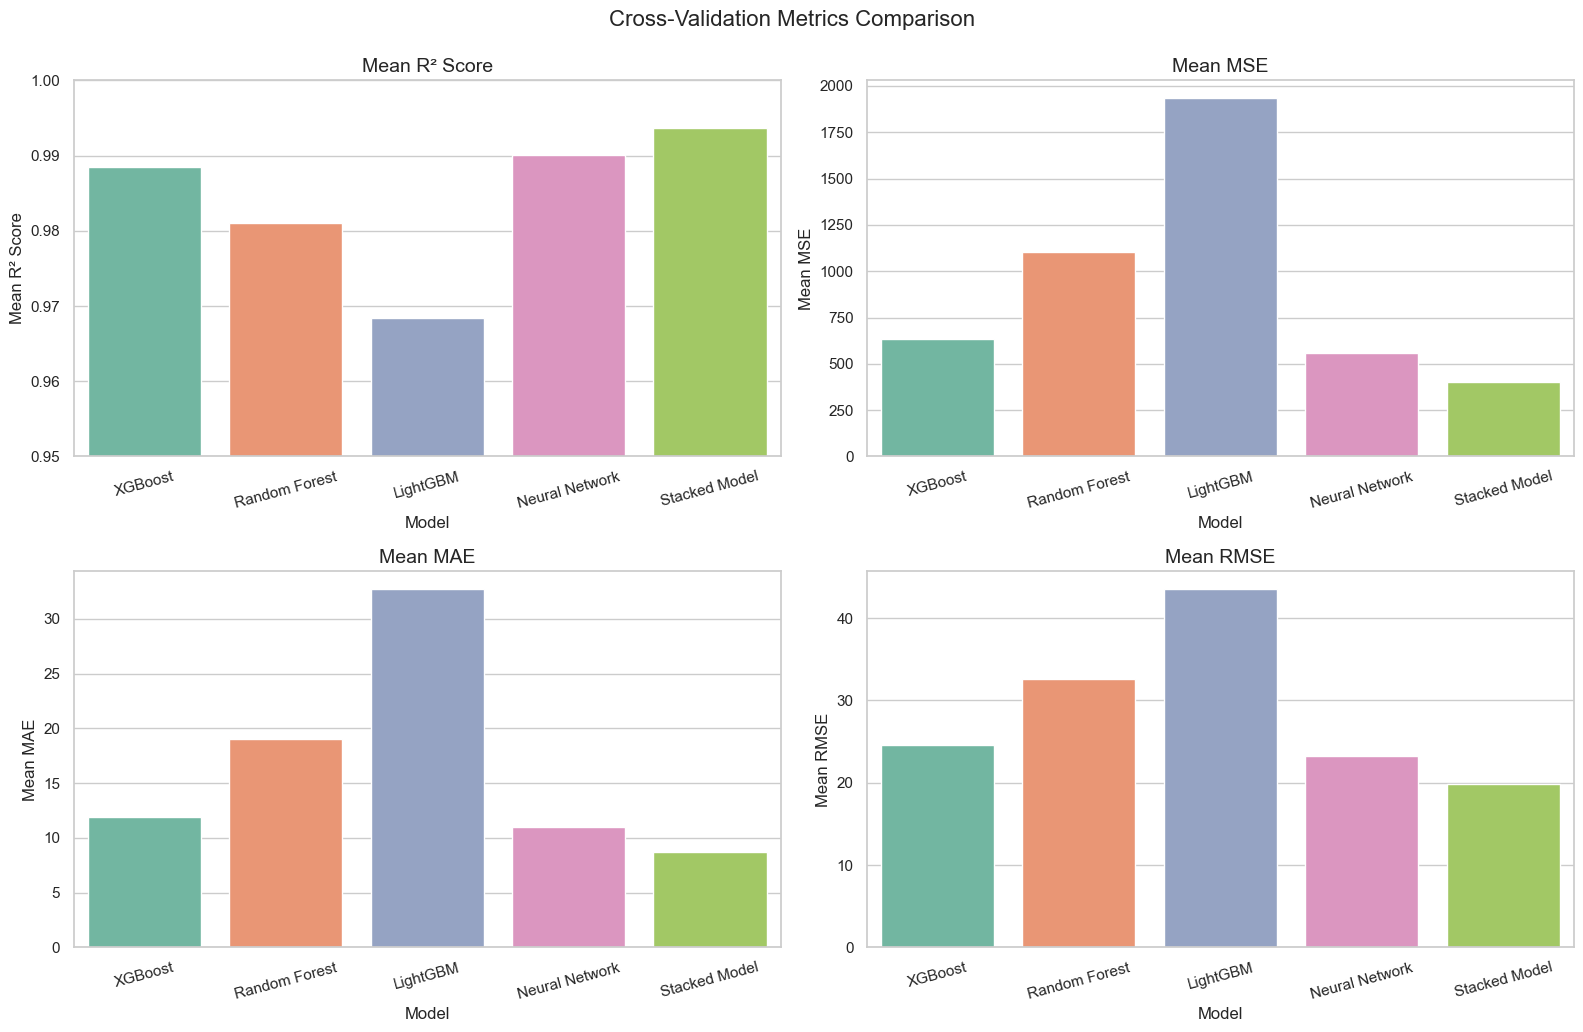

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
metrics = ["Mean R² Score", "Mean MSE", "Mean MAE", "Mean RMSE"]

plt.figure(figsize=(16, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=cv_results_df, x="Model", y=metric, palette="Set2")
    plt.title(metric, fontsize=14)
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=15)

    # Zoom in on R² score range
    if metric == "Mean R² Score":
        plt.ylim(0.95, 1.00)  # Adjust as needed to emphasize differences

plt.tight_layout()
plt.suptitle("Cross-Validation Metrics Comparison", fontsize=16, y=1.03)
plt.show()


In [129]:
test_r2 = r2_score(y_test, xgb_model.predict(X_test))
print("Test R² Score:", test_r2)

Test R² Score: 0.9877823640819112


### Training the data from January to June and testing it on July

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# # Load dataset (Assuming your dataframe is 'df')
# df['Datetime'] = pd.to_datetime(df.index)
# df = df.set_index('Datetime')

# Check dataset range
print("Dataset Date Range:", df.index.min(), "to", df.index.max())

# Split dataset into train (Jan–June) and test (July)

train = df[df.index < '2024-07-01']
test = df[df.index >= '2024-07-01']

# Verify split
print("Train Data Range:", train.index.min(), "to", train.index.max())
print("Test Data Range:", test.index.min(), "to", test.index.max())

# # Define features and target
X_train_jan_june = train.drop(columns=['ALLSKY_SFC_SW_DWN'])
y_train_jan_june = train['ALLSKY_SFC_SW_DWN']
X_test_july = test.drop(columns=['ALLSKY_SFC_SW_DWN'])
y_test_july = test['ALLSKY_SFC_SW_DWN']

Dataset Date Range: 2023-01-01 03:00:00 to 2024-07-30 23:00:00
Train Data Range: 2023-01-01 03:00:00 to 2024-06-30 06:00:00
Test Data Range: 2024-07-03 05:00:00 to 2024-07-30 23:00:00


In [131]:
#model = Stacked model()
model=stacked_model
model.fit(X_train_jan_june, y_train_jan_june)
# Predictions
y_pred_july = model.predict(X_test_july)
# Evaluate performance
r2 = r2_score(y_test_july, y_pred_july)
print(f"R² Score (Train Jan_2023–June_2024, Test July_2024): {r2:.4f}")

R² Score (Train Jan_2023–June_2024, Test July_2024): 0.9749


In [132]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Training prediction
y_train_pred = model.predict(X_train_jan_june)
r2_train = r2_score(y_train_jan_june, y_train_pred)
mae_train = mean_absolute_error(y_train_jan_june, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train_jan_june, y_train_pred))

# Testing prediction
r2_test = r2_score(y_test_july, y_pred_july)
mae_test = mean_absolute_error(y_test_july, y_pred_july)
rmse_test = np.sqrt(mean_squared_error(y_test_july, y_pred_july))

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train R²: 0.9982300213138888
Test R²: 0.9748897081176703
Train RMSE: 10.580134541121218
Test RMSE: 24.05710607315139


R² Score on July: 0.9749


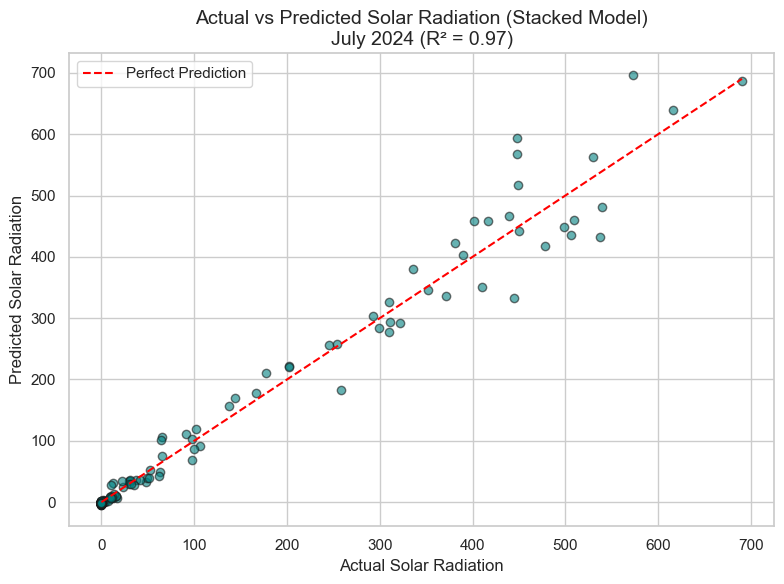

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on July data
stacked_pred_july = stacked_model.predict(X_test_july)

# Calculate R² just for confirmation
r2 = r2_score(y_test_july, stacked_pred_july)
print(f"R² Score on July: {r2:.4f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_july, stacked_pred_july, color='teal', edgecolors='k', alpha=0.6)
plt.plot([y_test_july.min(), y_test_july.max()],
         [y_test_july.min(), y_test_july.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.title(f"Actual vs Predicted Solar Radiation (Stacked Model)\nJuly 2024 (R² = {r2:.2f})", fontsize=14)
plt.xlabel("Actual Solar Radiation")
plt.ylabel("Predicted Solar Radiation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


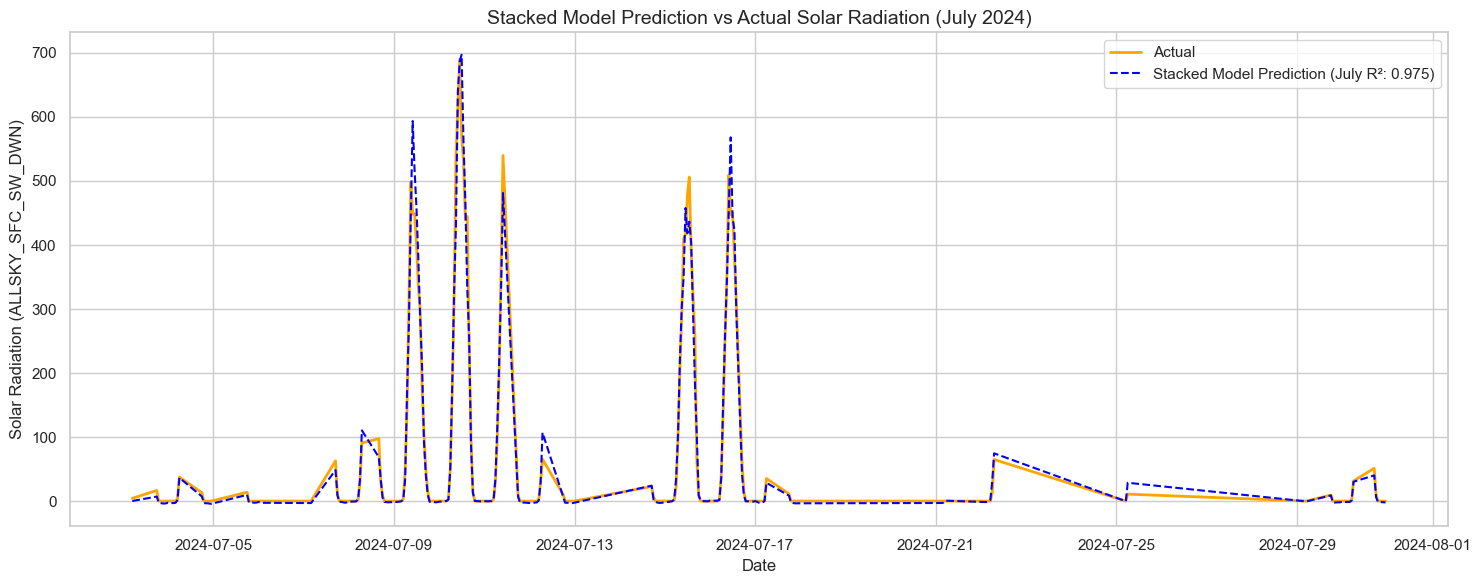

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Make predictions for July using the already trained stacked_model
stacked_pred_july = stacked_model.predict(X_test_july)

# Calculate R² score on July test data
stacked_r2_july = r2_score(y_test_july, stacked_pred_july)

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(y_test_july.index, y_test_july.values, label='Actual', color='orange', linewidth=2)
plt.plot(y_test_july.index, stacked_pred_july, label=f'Stacked Model Prediction (July R²: {stacked_r2_july:.3f})', 
         color='blue', linestyle='--')

plt.title('Stacked Model Prediction vs Actual Solar Radiation (July 2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Solar Radiation (ALLSKY_SFC_SW_DWN)')
plt.legend()
plt.tight_layout()
plt.show()
